In [129]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [130]:
from sklearn.datasets import load_breast_cancer

In [131]:
ldc = load_breast_cancer()
X = ldc['data']
y = ldc['target']

In [132]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [133]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [134]:
log_model = nn.Sequential(
    nn.Linear(30, 1),
    nn.Sigmoid()
)

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(log_model.parameters())



In [135]:
epoches = 5000
losses = []
x_train_tensor = torch.from_numpy(x_train_scaled.reshape(-1,30).astype(np.float32))
x_test_tensor = torch.from_numpy(x_test_scaled.reshape(-1, 30).astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.reshape(-1,1).astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.reshape(-1,1).astype(np.float32))

for it in range(epoches):
  optimizer.zero_grad()
  out = log_model(x_train_tensor)
  loss = criterion(out, y_train_tensor)
  losses.append(loss.item())
  loss.backward()
  optimizer.step()


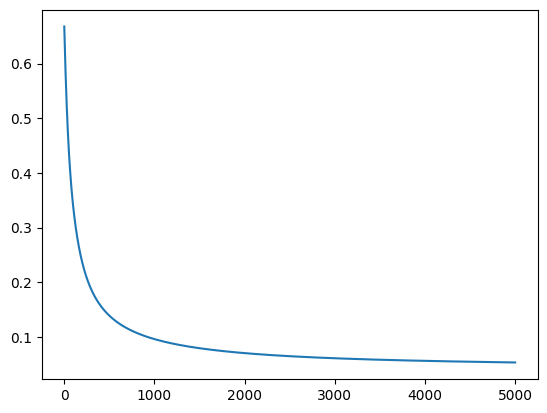

In [136]:
plt.plot(losses)

In [138]:
with torch.no_grad():
  pred = log_model(x_test_tensor)
  out = np.round(pred.numpy())
  print(np.mean(out==y_test_tensor.numpy()))

  pred = log_model(x_train_tensor)
  out = np.round(pred.numpy())
  print(np.mean(out==y_train_tensor.numpy()))

0.9824561403508771
0.989010989010989
